# MM20B007 DAL Assignment 5

In [127]:
# pip install --upgrade category_encoders

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

path = '/content/drive/MyDrive/sem 7/EE5708/Assignment 5/car_evaluation.xlsx'

In [129]:
data = pd.read_excel(path, names = ['Buying', 'Maintanance', 'Doors', 'No. of persons', 'Lug_boot', 'Safety', 'Target'])

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Buying          1727 non-null   object
 1   Maintanance     1727 non-null   object
 2   Doors           1727 non-null   object
 3   No. of persons  1727 non-null   object
 4   Lug_boot        1727 non-null   object
 5   Safety          1727 non-null   object
 6   Target          1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [131]:
for cols in list(data.columns):
  print(data[cols].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
[2 3 4 '5more']
[2 4 'more']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


Text(0, 0.5, 'Count')

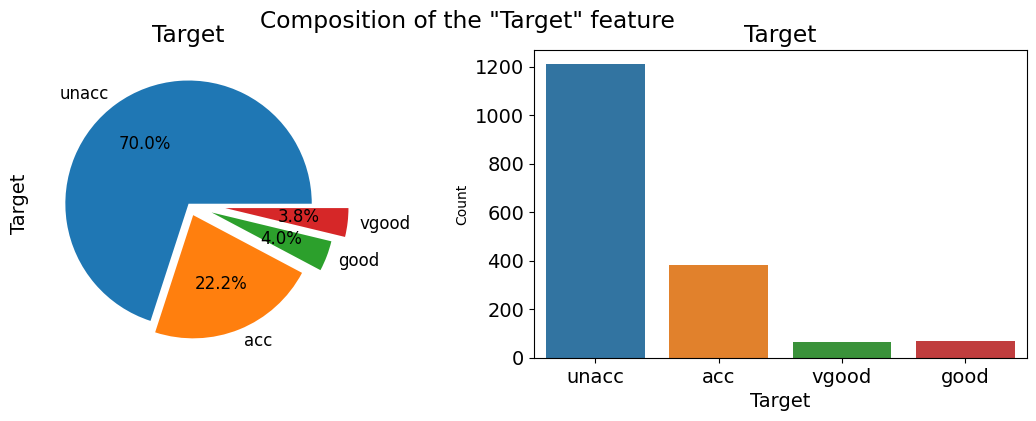

In [173]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
fig.suptitle('Composition of the "Target" feature')
data['Target'].value_counts().plot.pie(ax = ax[0], explode=[0, 0.1, 0.2, 0.3],autopct='%1.1f%%',shadow=False, textprops={'fontsize': 12})
ax[0].set_title('Target')
# ax[0].set_ylabel('Count', fontsize = 10)
sns.countplot(x = 'Target', data = data, ax=ax[1])
ax[1].set_title('Target')
ax[1].set_ylabel('Count', fontsize = 10)

In [133]:
df = data.copy()

Text(0, 0.5, 'Count')

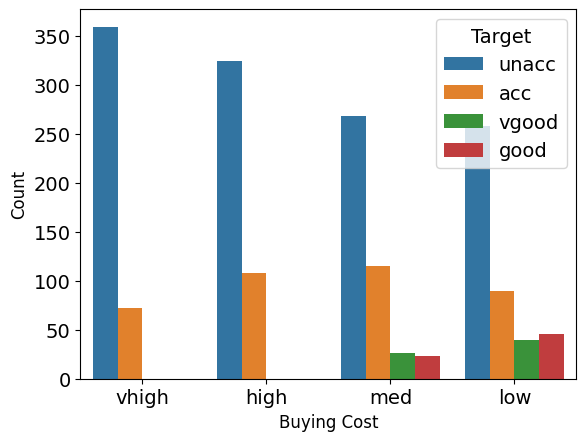

In [134]:
sns.countplot(df, x = 'Buying', hue = 'Target')
plt.xlabel('Buying Cost', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

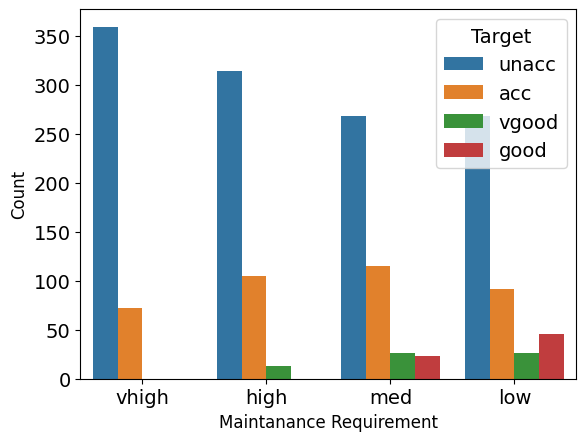

In [135]:
sns.countplot(df, x = 'Maintanance', hue = 'Target')
plt.xlabel('Maintanance Requirement', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

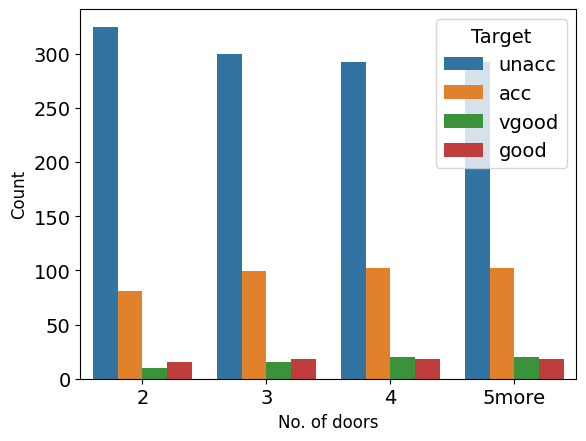

In [136]:
sns.countplot(df, x = 'Doors', hue = 'Target')
plt.xlabel('No. of doors', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

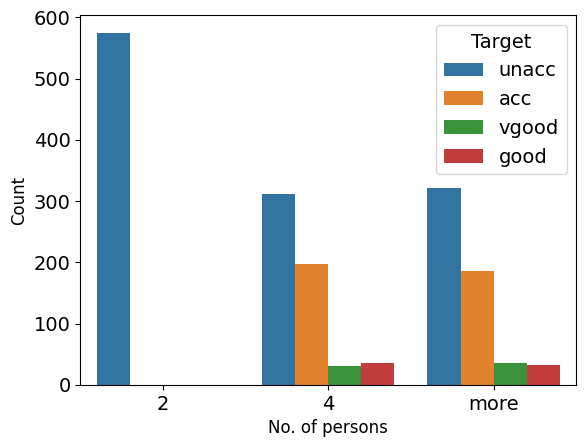

In [137]:
sns.countplot(df, x = 'No. of persons', hue = 'Target')
plt.xlabel('No. of persons', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

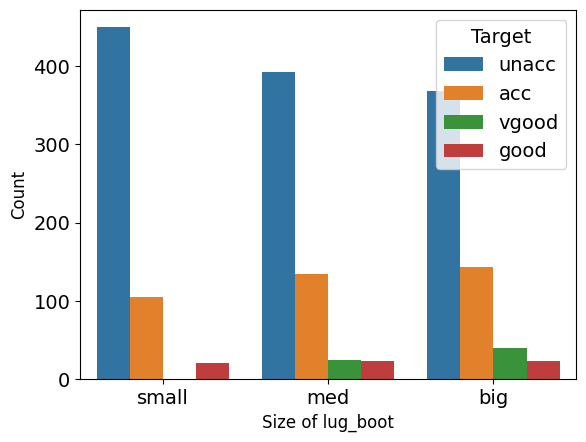

In [138]:
sns.countplot(df, x = 'Lug_boot', hue = 'Target')
plt.xlabel('Size of lug_boot', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

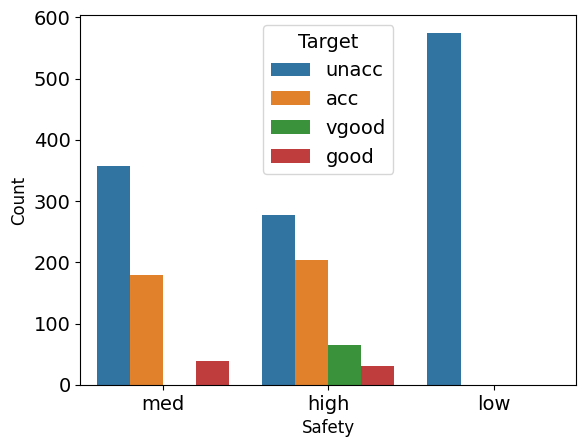

In [139]:
sns.countplot(df, x = 'Safety', hue = 'Target')
plt.xlabel('Safety', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

## Observations

The target feature has four categories and the above heatmap shows a overall effect.

**Target vs Buying cost**\
They have positive correlation of 0.29, making buying cost a major factor.

**Target vs Maintance requirement**\
Maintanance turned out to have a positive association of 0.25 with target.

**Target vs No. of Doors**\
The value implies that number of doors are not that much important.

**Target vs No. of person**\
Among all features it has the highest positive association with target.

**Target vs lug_boot**\
Has positive correlation with target but weak.

**Target vs Safety**\
It has negative correlation with target, we need to check it more thoroughly.

## Doing one hot encoding

In [140]:
df_dummies = data.copy()

In [141]:
for cols in list(data.columns):
  dummy = pd.get_dummies(df_dummies[cols], prefix = cols, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first = False, dtype=None)
  df_dummies.drop(cols, axis = 1, inplace = True)
  df_dummies = df_dummies.join(dummy)

In [142]:
df_dummies

,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maintanance_high,Maintanance_low,Maintanance_med,Maintanance_vhigh,Doors_2,Doors_3,...,Lug_boot_big,Lug_boot_med,Lug_boot_small,Safety_high,Safety_low,Safety_med,Target_acc,Target_good,Target_unacc,Target_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1723,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'Buying_high'),
  Text(0, 1.5, 'Buying_low'),
  Text(0, 2.5, 'Buying_med'),
  Text(0, 3.5, 'Buying_vhigh'),
  Text(0, 4.5, 'Maintanance_high'),
  Text(0, 5.5, 'Maintanance_low'),
  Text(0, 6.5, 'Maintanance_med'),
  Text(0, 7.5, 'Maintanance_vhigh'),
  Text(0, 8.5, 'Doors_2'),
  Text(0, 9.5, 'Doors_3'),
  Text(0, 10.5, 'Doors_4'),
  Text(0, 11.5, 'Doors_5more'),
  Text(0, 12.5, 'No. of persons_2'),
  Text(0, 13.5, 'No. of persons_4'),
  Text(0, 14.5, 'No. of persons_more'),
  Text(0, 15.5, 'Lug_boot_big'),
  Text(0, 16.5, 'Lug_boot_med'),
  Text(0, 17.5, 'Lug_boot_small'),
  Text(0, 18.5, 'Safety_high'),
  Text(0, 19.5, 'Safety_low'),
  Text(0, 20.5, 'Safety_med'),
  Text(0, 21.5, 'Target_acc'),
  Text(0, 22.5, 'Target_good'),
  Text(0, 23.5, 'Target_unacc'),
  Text(0, 24.5, 'Target_vgood')])

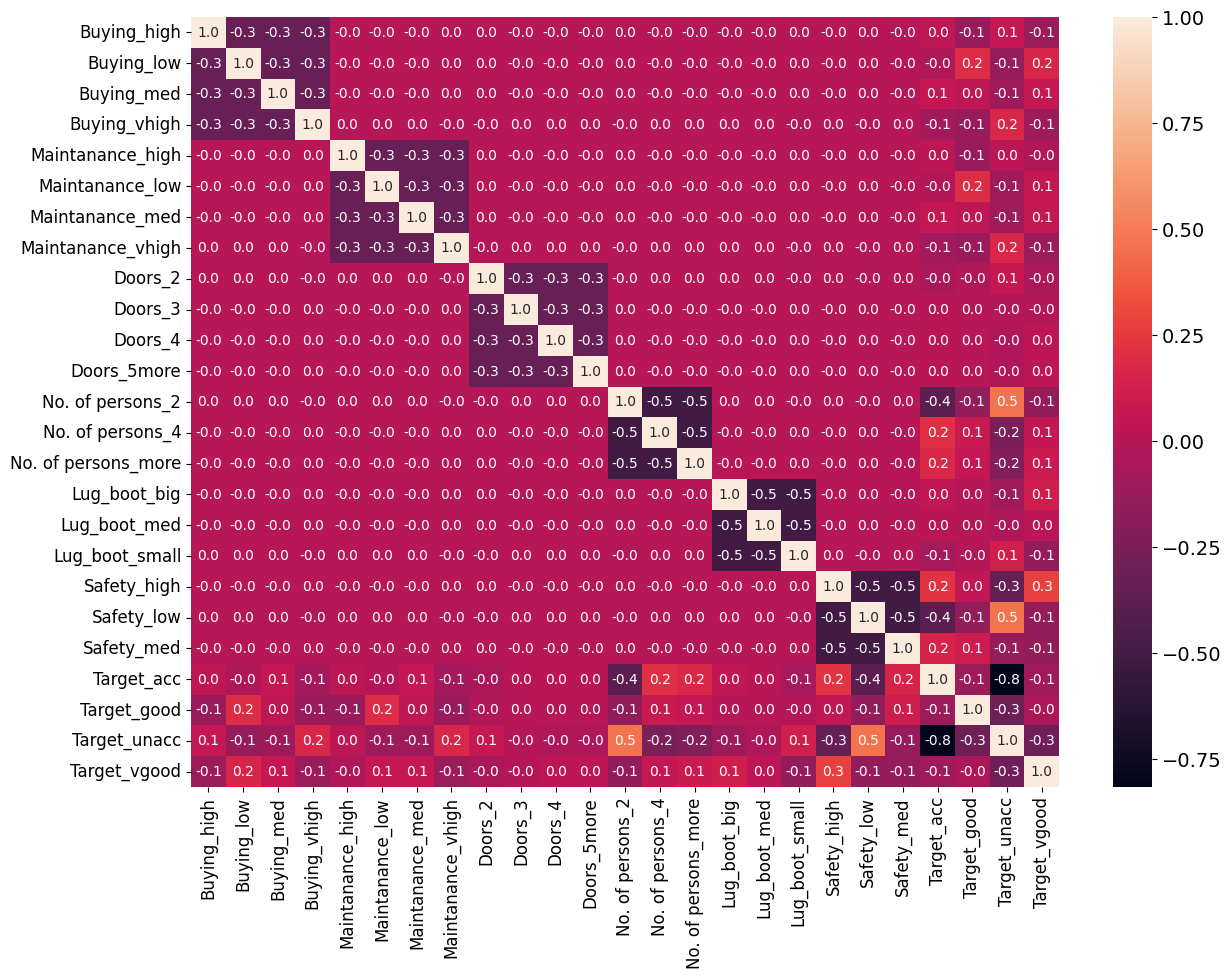

In [172]:
df_corr = df_dummies.corr()

plt.figure(figsize = (14, 10))
sns.heatmap(df_corr, annot = True, fmt = '0.1f', annot_kws={"size": 10})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

## Observations
1. Target vs Safety:
    *   for Safety low category as expected the the target category unacc has highest positive correlation, rest categories have negative association.
    *   For other two categories of safety the acc and vgood have positive correlation whereas good category remains the same.
    *   Becaue of high negative correlation between safety_low and Target_acc we are getting the overall correlation a negative value.
2. Target vs No. of person:
    *   a car with only two person capacity is highly unaccepted that's why it has a high negative correlation with acc, good, and vgood.
    *   a car with 4 or more person capacity is acc and considered good and vgood.
3. It is found that doors have very minimal effect on the cars' acceptability, since it has association close to 0 with the target feature.
4. Buying and Maintance have significant effect on the cars' acceptability, and it was expected.





In [144]:
MI_score = {}
output = list(df_dummies.columns)[-4:]
for items in output:
  score = mutual_info_classif(df_dummies.iloc[:, :-4], df_dummies[items])
  MI_score[items] = list(score)

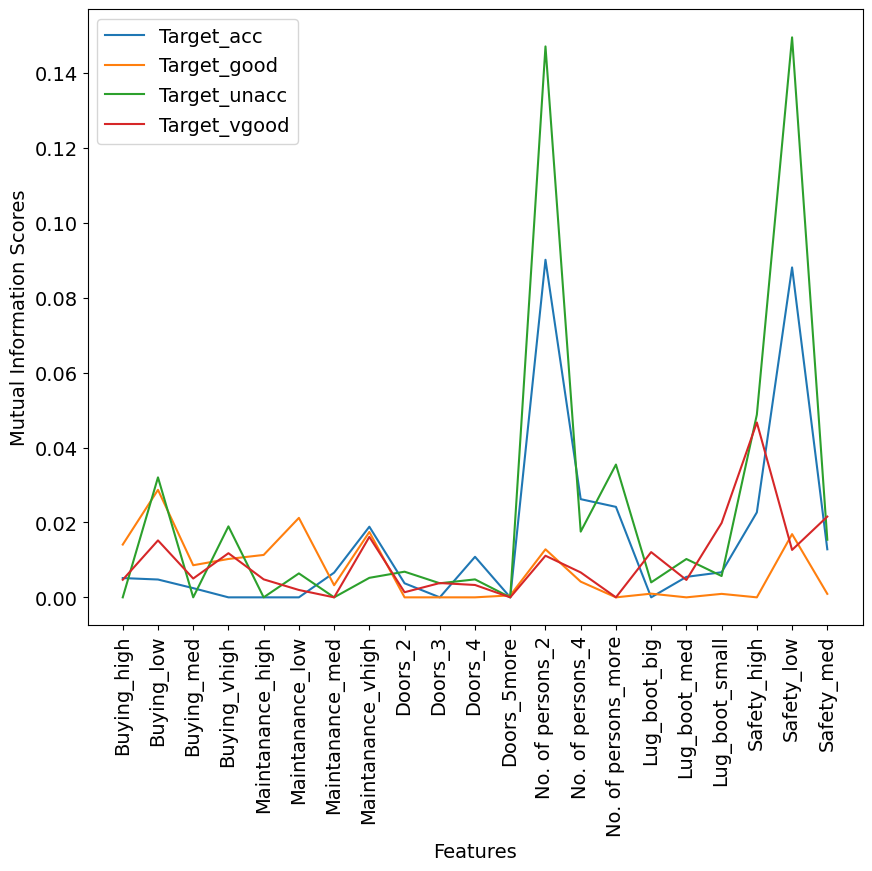

In [145]:
# Create a figure and axis
fig, ax = plt.subplots(figsize = (10, 8))

# Plot each key in the data dictionary
for key, values in MI_score.items():
    ax.plot(values, label=key)

# Set labels and title
ax.set_xlabel('Features', fontsize = 14)
ax.set_xticks(range(len(list(df_dummies.columns)[:-4])))
ax.set_xticklabels(list(df_dummies.columns)[:-4], rotation=90)
ax.set_ylabel('Mutual Information Scores', fontsize = 14)

# Add a legend
ax.legend()

# Display the plot
plt.show()

## Observations
1. **Target_acc & Target_unacc**: the MI score for No. of person 2 is highest implying that these two features have statistical dependency and we have seen that they are negatively correlated, hence we can say that if a car has 2 person capacity then it will have high chance of rejection or we can say it is unacceptable. Similar argument goes with Safety_low.
2. For the other features the MI score is somewhat similar so it is difficult to do feature selection.



---



---


## Label Encoding

In [146]:
df_le = data.copy()

In [147]:
X = df_le.drop('Target', axis = 1)
y = df_le['Target']

In [148]:
cols = X.columns

In [149]:
encoder = ce.OrdinalEncoder(cols=cols)
x= encoder.fit_transform(X)

In [150]:
x.head()

,Buying,Maintanance,Doors,No. of persons,Lug_boot,Safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


## Splitting the data

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [152]:
print('Training Dataset',X_train.shape,y_train.shape)
print('\n Class label distribution in Training Set\
n',y_train.value_counts())
print('\n***********')
print("\n CrossValidation Dataset",X_test.shape,y_test.shape)
print('\nClass label distribution in Cross Validation Set\
n',y_test.value_counts())
print('\n***********')

Training Dataset (1381, 6) (1381,)

 Class label distribution in Training Setn unacc    972
acc      307
good      54
vgood     48
Name: Target, dtype: int64

***********

 CrossValidation Dataset (346, 6) (346,)

Class label distribution in Cross Validation Setn unacc    237
acc       77
vgood     17
good      15
Name: Target, dtype: int64

***********


## Applying Random Forest

Using RandomizedSearchCV to find the best parameters using the random forest classifier as estimator.

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [153]:
# Generating paramter values
n_estimators  = [x for x in range(200, 2000, 200)]
criterion = ['gini', 'entropy', 'log_loss']
# max_depth = [x for x in range(2, 20, 2)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 30, num = 1)]
max_depth.append(None)
min_samples_split = [ 2,3, 4, 5, 7,10]
min_samples_leaf = [1, 2, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
}

In [154]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [155]:
print('The best model is ', rf_random.best_estimator_)
print("\n The best model parameters are ",rf_random.best_params_)
print("\n The model accuracy on train set is",rf_random.score(X_train,y_train))
print("\n The model accuracy on test set is",rf_random.score(X_test,y_test))
y_predict_1 = rf_random.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_1, normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict_1))

The best model is  RandomForestClassifier(bootstrap=False, criterion='log_loss',
                       max_features='auto', min_samples_split=3,
                       n_estimators=200)

 The best model parameters are  {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'log_loss', 'bootstrap': False}

 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9682080924855492


 Classification Report
              precision    recall  f1-score   support

         acc       0.95      0.97      0.96        77
        good       0.85      0.73      0.79        15
       unacc       1.00      1.00      1.00       237
       vgood       0.71      0.71      0.71        17

    accuracy                           0.97       346
   macro avg       0.88      0.85      0.86       346
weighted avg       0.97      0.97      0.97       346



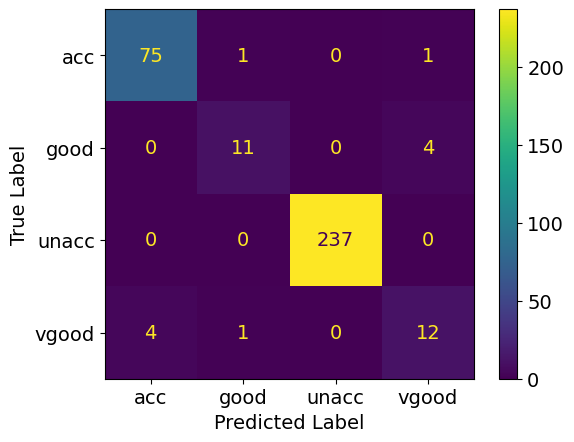

In [156]:
cm = confusion_matrix(y_test, y_predict_1)
cm_display = ConfusionMatrixDisplay(cm, display_labels = rf_random.classes_).plot()

plt.rcParams.update({'font.size': 14})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [157]:
param_dict = dict(rf_random.best_params_)
param_dict

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'log_loss',
 'bootstrap': False}

In [158]:
# Defining the model with the best parameters
clf = RandomForestClassifier(n_estimators = param_dict['n_estimators'], bootstrap = param_dict['bootstrap'], criterion = param_dict['criterion'],
                             max_depth = param_dict['max_depth'], max_features = param_dict['max_features'], min_samples_leaf = param_dict['min_samples_leaf'],
                             min_samples_split = param_dict['min_samples_split'])
clf.fit(X_train, y_train)
RandomForestClassifier(min_samples_split=3, n_estimators=1000)
print("\n The model accuracy on train set is",clf.score(X_train,y_train))
print("\n The model accuracy on test set is",clf.score(X_test,y_test))
y_predict_2 = clf.predict(X_test)
accuracy=accuracy_score(y_test,y_predict_2,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(y_test,y_predict_2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 The model accuracy on train set is 1.0

 The model accuracy on test set is 0.9710982658959537


 Classification Report
              precision    recall  f1-score   support

         acc       0.95      0.99      0.97        77
        good       1.00      0.67      0.80        15
       unacc       1.00      1.00      1.00       237
       vgood       0.68      0.76      0.72        17

    accuracy                           0.97       346
   macro avg       0.91      0.85      0.87       346
weighted avg       0.97      0.97      0.97       346



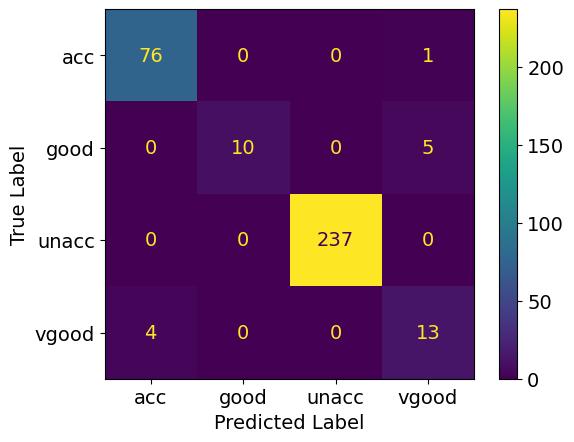

In [159]:
cm = confusion_matrix(y_test, y_predict_2)
cm_display = ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()

plt.rcParams.update({'font.size': 14})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
feature_scores = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_scores

Safety            0.307093
No. of persons    0.243509
Maintanance       0.161006
Buying            0.158484
Lug_boot          0.087805
Doors             0.042102
dtype: float64

Text(0, 0.5, 'Features')

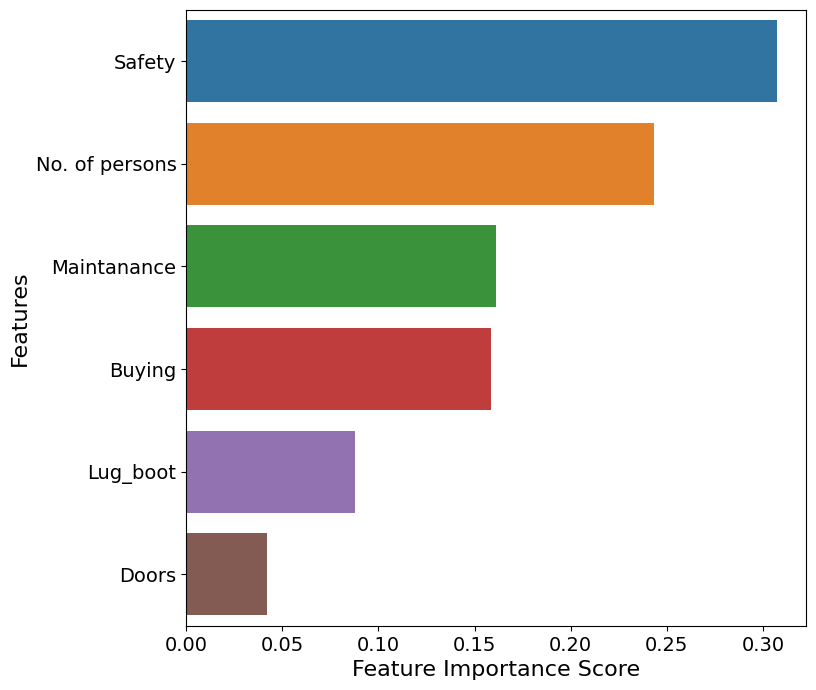

In [161]:
plt.figure(figsize = (8, 8))
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel('Feature Importance Score', fontsize = 16)
plt.ylabel('Features', fontsize = 16)

Here we can see that 'doors' feature has very less feature score and we have already did feature selection using mutual information score that 'doors' feature is not of much use.

Building model with selected features

In [162]:
X1 = x.drop('Doors', axis = 1)
Y1 = y

In [163]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [164]:
# Defining the model with the best parameters
clf = RandomForestClassifier(n_estimators = param_dict['n_estimators'], bootstrap = param_dict['bootstrap'], criterion = param_dict['criterion'],
                             max_depth = param_dict['max_depth'], max_features = param_dict['max_features'], min_samples_leaf = param_dict['min_samples_leaf'],
                             min_samples_split = param_dict['min_samples_split'])
clf.fit(X1_train, Y1_train)
RandomForestClassifier(min_samples_split=3, n_estimators=1000)
print("\n The model accuracy on train set is",clf.score(X1_train,Y1_train))
print("\n The model accuracy on test set is",clf.score(X1_test,Y1_test))
y_predict_3 = clf.predict(X1_test)
accuracy=accuracy_score(Y1_test,y_predict_3,normalize=True)*float(100)
print('\n\n Classification Report')
print(classification_report(Y1_test,y_predict_3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



 The model accuracy on train set is 0.9666908037653874

 The model accuracy on test set is 0.9364161849710982


 Classification Report
              precision    recall  f1-score   support

         acc       0.88      0.92      0.90        77
        good       0.69      0.60      0.64        15
       unacc       1.00      0.98      0.99       237
       vgood       0.63      0.71      0.67        17

    accuracy                           0.94       346
   macro avg       0.80      0.80      0.80       346
weighted avg       0.94      0.94      0.94       346



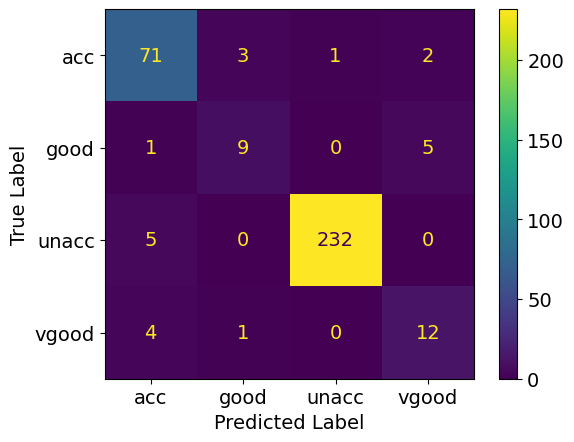

In [165]:
cm = confusion_matrix(Y1_test, y_predict_3)
cm_display = ConfusionMatrixDisplay(cm, display_labels = clf.classes_).plot()

plt.rcParams.update({'font.size': 14})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()